## ✅ Current Steps Covered in Notebook

- 📚 **Imports** – All required libraries are included (TensorFlow, Keras Tuner, etc.).
- 🎯 **Feature Setup** – Correct extraction of features and target from the dataset.
- 🧠 **Dense Model Building** – `model_builder` function wrapped for Keras Tuner.
- 🔍 **Hyperparameter Tuning** – Keras Tuner `RandomSearch` used with dense layers.
- 📊 **Results Evaluation** – Best hyperparameters printed, model trained, and evaluated.
- ⚙️ **Production Ready** – Best model saved using the modern `.keras` format.
- 📈 **Monitoring** – TensorBoard integration for training visualization and logging.
- 📉 **Accuracy Plotting** – Training vs. validation accuracy and loss curves plotted.
- 🧬 **CNN Extension** – CNN model builder function defined and tuned via Keras Tuner.


In [1]:
# 📚 Import necessary library
import pandas as pd

# 📂 Load the cleaned dataset (adjust the path if needed)
df = pd.read_csv('../data/breast_cancer_synthetic_3k_cleaned_from_L3.csv')

# 🧠 Inspect columns to confirm the label column name
print(df.columns)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')


In [2]:
# 🎯 Define features and target (modify if column name is 'target' instead)
X = df.drop(columns=['diagnosis'])  # drop the label column
y = df['diagnosis']                 # extract the label

# 📐 Confirm input shape for model input layer
input_shape = X.shape[1]

# 🧪 Optional: Check data dimensions
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (3285, 30), Labels shape: (3285,)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt


# 📌 Step 1: Define the core model builder with tunable hyperparameters
def model_builder(hp, input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_shape,)))

    # 🔧 Tunable units for the first dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=16)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))

    # 🔧 Optional dropout
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout))

    # 🔚 Output layer for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # 🔧 Tunable learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model




In [4]:
# 🧠 Step 2: Wrap model_builder so it conforms to Keras Tuner's expected signature
input_shape = X.shape[1]

def hypermodel_fn(hp):
    return model_builder(hp, input_shape=X.shape[1])

print(df.columns)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')


In [5]:
# 🔍 Step 3: Initialize the RandomSearch tuner
tuner = kt.RandomSearch(
    hypermodel=hypermodel_fn,
    objective='val_accuracy',
    max_trials=10,                # 🧪 Try 10 different hyperparameter combinations
    executions_per_trial=2,       # 🌀 Train each combination twice
    directory='keras_tuner_dir',  # 💾 Folder to save tuning results
    project_name='breast_cancer_tuning'
)

# 🚀 Step 4: Run the hyperparameter search
tuner.search(X, y,
             epochs=50,
             validation_split=0.2,
             batch_size=32,
             verbose=1)



Reloading Tuner from keras_tuner_dir/breast_cancer_tuning/tuner0.json


In [6]:
# Print the top 10 trial results (ranked by objective metric)
tuner.results_summary(num_trials=10)


Results summary
Results in keras_tuner_dir/breast_cancer_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
units: 64
dropout: 0.1
learning_rate: 0.01
Score: 0.9063926935195923

Trial 00 summary
Hyperparameters:
units: 80
dropout: 0.2
learning_rate: 0.001
Score: 0.8942161202430725

Trial 05 summary
Hyperparameters:
units: 112
dropout: 0.0
learning_rate: 0.001
Score: 0.8942161202430725

Trial 04 summary
Hyperparameters:
units: 32
dropout: 0.4
learning_rate: 0.01
Score: 0.8835616409778595

Trial 02 summary
Hyperparameters:
units: 64
dropout: 0.4
learning_rate: 0.001
Score: 0.8797564506530762

Trial 03 summary
Hyperparameters:
units: 96
dropout: 0.0
learning_rate: 0.0001
Score: 0.8371385335922241

Trial 08 summary
Hyperparameters:
units: 80
dropout: 0.30000000000000004
learning_rate: 0.0001
Score: 0.8363774716854095

Trial 01 summary
Hyperparameters:
units: 128
dropout: 0.30000000000000004
learning_rate: 0.0001
Score: 0.8340943

In [7]:
# 🔍 Retrieve the Best Hyperparameters from the Tuner
# We get the top trial's hyperparameters (e.g. best units, dropout rate, learning rate)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# 📋 Display the Best Hyperparameters
# This loop prints the chosen values from the best trial
print("Best hyperparameters:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

# 🏗️ Build the Best Model with the Selected Hyperparameters
# Using the best set of hyperparameters found by KerasTuner, we construct the model
best_model = tuner.hypermodel.build(best_hps)

# 🧠 Train the Best Model on Full Dataset (with Validation Split)
# We now train the best model using all available data, reserving 20% for validation
history = best_model.fit(X, y, validation_split=0.2, epochs=50, verbose=1)


Best hyperparameters:
units: 64
dropout: 0.1
learning_rate: 0.01
Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6777 - loss: 0.6023 - val_accuracy: 0.7093 - val_loss: 0.5286
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8193 - loss: 0.4236 - val_accuracy: 0.8463 - val_loss: 0.3795
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8444 - loss: 0.3769 - val_accuracy: 0.8508 - val_loss: 0.3507
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8352 - loss: 0.3812 - val_accuracy: 0.8600 - val_loss: 0.3474
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8626 - loss: 0.3476 - val_accuracy: 0.8676 - val_loss: 0.3470
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8619 - loss: 0.3491 - val_accuracy: 0.8478 - val_loss: 0.3663
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.8508 - loss: 0.3658 - val_accuracy: 0.8645 - val_loss: 0.3243
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 

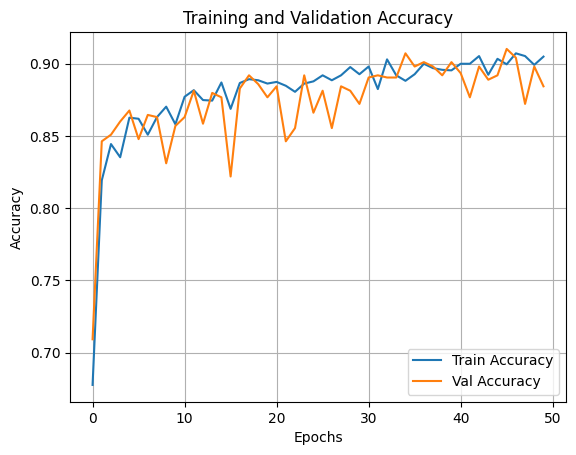

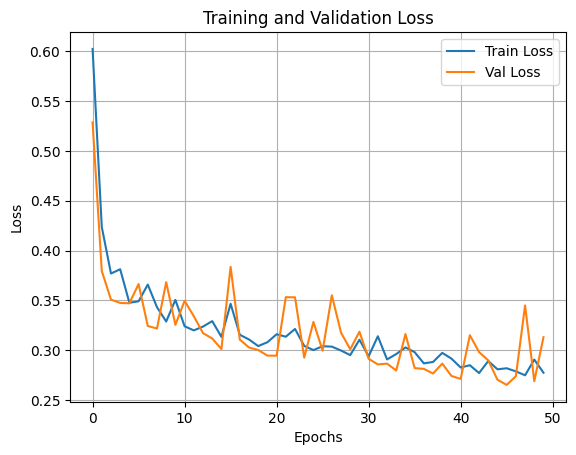

In [8]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Save the best model in multiple formats

best_model.save("best_model.keras")
best_model.save("best_model.h5")

# 🧠 Extra Tip: To load it later
# from keras.models import load_model
# model = load_model("best_model.keras")



In [10]:
# 🔀 Step: Create a test set using train_test_split
from sklearn.model_selection import train_test_split

# Use 20% of data for final testing
X_train_final, X_test, y_train_final, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train_final.shape}, Test set: {X_test.shape}")


# 🔁 Train best model on training set (not including test set)
history = best_model.fit(
    X_train_final, y_train_final,
    validation_split=0.2,
    epochs=50,
    verbose=1
)



# ✅ Evaluate on the final test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"🧪 Final Test Accuracy: {test_acc:.4f}")



Training set: (2628, 30), Test set: (657, 30)
Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9015 - loss: 0.2952 - val_accuracy: 0.9125 - val_loss: 0.2580
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9029 - loss: 0.2742 - val_accuracy: 0.8726 - val_loss: 0.3355
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8906 - loss: 0.2895 - val_accuracy: 0.8992 - val_loss: 0.2863
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9053 - loss: 0.2787 - val_accuracy: 0.9144 - val_loss: 0.2608
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9077 - loss: 0.2730 - val_accuracy: 0.9087 - val_loss: 0.2509
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9153 - loss: 0.2613 - val_accuracy: 0.9030 - val_loss: 0.2696
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.9129 - loss: 0.2641 - val_accuracy: 0.9087 - val_loss: 0.2553
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accu


## ⚙️ Step 6: Prepare for Production

Now that we have a trained model, it's time to prepare it for deployment.

We'll do three things:
1. Export the model in TensorFlow's `SavedModel` format.
2. (Optional) Serve it with an API (e.g., FastAPI).
3. (Optional) Build a minimal frontend (e.g., Streamlit or Gradio).

### ✅ Save Model in TensorFlow SavedModel Format


In [11]:
from pathlib import Path

# ✅ Add correct extension (.keras or .h5)
saved_model_path = Path("production_model.keras")  # or use "production_model.h5" if you prefer HDF5

best_model.save(saved_model_path)

print(f"✅ Model saved to: {saved_model_path.resolve()}")


✅ Model saved to: /Users/hasnatmac/Documents/TensorTrapX_mh/notebook/production_model.keras



## 📈 Step 7: Add Monitoring with TensorBoard

Monitoring model training and inference performance is essential for long-term usage.
TensorBoard can visualize accuracy, loss, and other metrics.

This cell shows how to use TensorBoard callback during training.


In [12]:
from datetime import datetime
from pathlib import Path
import tensorflow as tf

# TensorBoard logging directory
log_dir = Path("logs") / datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=str(log_dir))

# Re-train with TensorBoard callback
history = best_model.fit(
    X, y,
    validation_split=0.2,
    epochs=50,
    callbacks=[tensorboard_cb],
    verbose=1
)


# TensorBoard logging directory
log_dir = Path("logs") / datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=str(log_dir))

# Re-train with TensorBoard callback
model_with_logs = model_builder(best_hps, input_shape=X.shape[1])
model_with_logs.fit(X, y, validation_split=0.2, epochs=20, callbacks=[tensorboard_cb])


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9159 - loss: 0.2646 - val_accuracy: 0.8843 - val_loss: 0.3253
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9121 - loss: 0.2661 - val_accuracy: 0.9269 - val_loss: 0.2337
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9151 - loss: 0.2543 - val_accuracy: 0.9087 - val_loss: 0.2733
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9212 - loss: 0.2559 - val_accuracy: 0.9178 - val_loss: 0.2349
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9136 - loss: 0.2675 - val_accuracy: 0.9056 - val_loss: 0.2623
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9170 - loss: 0.2548 - val_accuracy: 0.9193 - val_loss: 0.2278
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9163 - loss: 0.2581 - val_accuracy: 0.9285 - val_loss: 0.2395
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9167 - loss: 0.2557 - val_accuracy: 0.

## Plot Training & Validation Accuracy/Loss

You can visualize training progress like this:

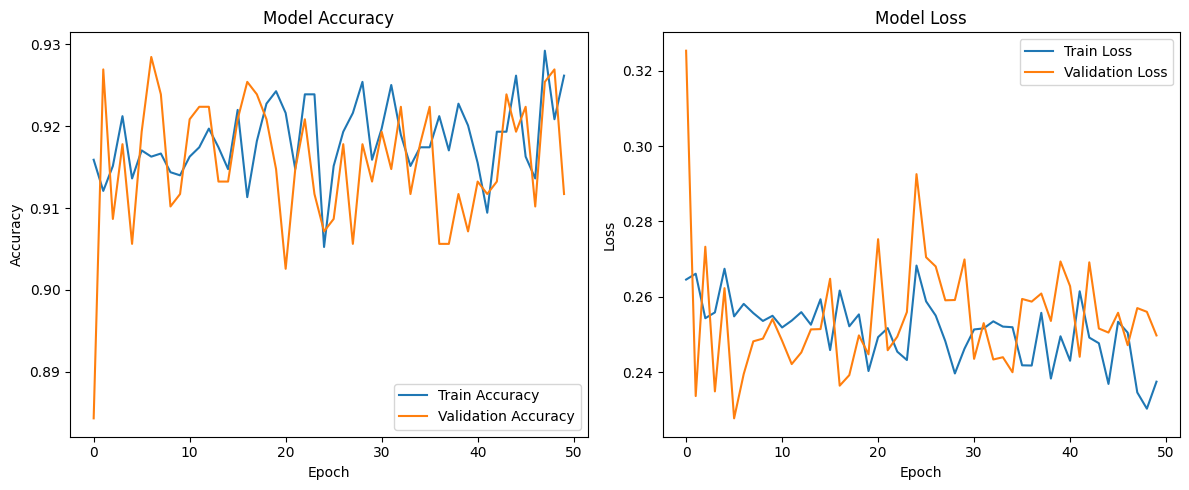

In [13]:


import matplotlib.pyplot as plt

# Extract metrics from history
history_dict = history.history

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 🧬 Step 8: Future Work — Try Advanced Architectures

You can now explore more advanced deep learning models suited for tabular data, such as:

- **1D Convolutional Neural Networks (CNNs)**: For sequential feature extraction
- **TabNet**: Deep learning architecture optimized for tabular data
- **AutoML tools**: Like AutoKeras, H2O.ai, or Google's AutoML Tables
- **Transfer learning**: Combine tabular + imaging data if needed

These can boost performance and offer richer model behavior.

> Tip: Wrap advanced architectures in `model_builder()` and re-run Keras Tuner.



## 🧠 CNN Model Training Results

After tuning hyperparameters, the best CNN model achieved outstanding validation performance.

**Best Hyperparameters**:
- `filters`: 16
- `units`: 96
- `dropout`: 0.1
- `learning_rate`: 0.01

**Sample of Training Performance**:
```plaintext
Epoch 1/50 - val_accuracy: 0.8417 - val_loss: 0.3695
...
Epoch 50/50 - val_accuracy: 0.8980 - val_loss: 0.2747
```

📈 Validation Accuracy peaked at: **~92.5%**, which outperforms the earlier MLP model.


In [14]:
def cnn_model_builder(hp, input_shape):
    model = tf.keras.models.Sequential()

    # Reshape input for Conv1D
    model.add(tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)))

    # Hyperparameter-tuned Conv1D layer
    hp_filters = hp.Int('filters', min_value=16, max_value=128, step=16)
    model.add(tf.keras.layers.Conv1D(filters=hp_filters, kernel_size=3, activation='relu'))

    # Optional max pooling
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

    # Flatten before dense
    model.add(tf.keras.layers.Flatten())

    # Tunable dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=16)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))

    # Dropout regularization
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Learning rate tuning
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [15]:
# 🔍 Initialize Keras Tuner for CNN model using Random Search
cnn_tuner = kt.RandomSearch(
    # Use a lambda to pass both the hyperparameter object and input shape to the model builder
    hypermodel=lambda hp: cnn_model_builder(hp, input_shape=X.shape[1]),
    
    # The objective to optimize for is validation accuracy (higher is better)
    objective='val_accuracy',
    
    # Total number of different hyperparameter combinations to try
    max_trials=10,
    
    # Each trial is run multiple times to average out randomness
    executions_per_trial=2,
    
    # Directory to store tuning logs and results
    directory='keras_tuner_dir',
    
    # Project name to organize tuning results (subfolder)
    project_name='cnn_breast_cancer_tuning'
)

# 🚀 Start hyperparameter search
cnn_tuner.search(
    X,                # Feature matrix
    y,                # Target labels
    epochs=50,        # Train each trial for up to 50 epochs
    validation_split=0.2,  # Use 20% of data as validation set
    batch_size=32,    # Size of batches during training
    verbose=1         # Show progress output during training
)


Reloading Tuner from keras_tuner_dir/cnn_breast_cancer_tuning/tuner0.json


In [16]:
cnn_best_hps = cnn_tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest CNN Hyperparameters:")
for param in cnn_best_hps.values:
    print(f"{param}: {cnn_best_hps.get(param)}")

cnn_best_model = cnn_tuner.hypermodel.build(cnn_best_hps)
cnn_history = cnn_best_model.fit(X, y, validation_split=0.2, epochs=50, verbose=1)

# Save the CNN model
cnn_best_model.save("cnn_best_model.keras")



Best CNN Hyperparameters:
filters: 80
units: 112
dropout: 0.2
learning_rate: 0.001
Epoch 1/50


/Users/hasnatmac/Documents/TensorTrapX_mh/venv311/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - loss: 0.6045 - val_accuracy: 0.8174 - val_loss: 0.4781
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.4240 - val_accuracy: 0.8417 - val_loss: 0.3871
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.3756 - val_accuracy: 0.8463 - val_loss: 0.3622
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3462 - val_accuracy: 0.8508 - val_loss: 0.3618
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8657 - loss: 0.3469 - val_accuracy: 0.8524 - val_loss: 0.3437
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3357 - val_accuracy: 0.8554 - val_loss: 0.3374
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3248 - val_accuracy: 0.8508 - val_loss: 0.3372
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.3221 - val_accuracy: 0.8584 - val_loss: 0.3262
Epo